10 0.2726865923674434
20 0.16661304161304163
30 0.0791005291005291
40 0.07661064425770309
50 0.04421768707482993
      Num Train Sentences               Metric  Word Error Rate (%)
0                      10  T17 Word Error Rate                  100
1                      10  T17 Word Error Rate                  140
2                      10  T17 Word Error Rate                  100
3                      10  T17 Word Error Rate                   75
4                      10  T17 Word Error Rate                  100
...                   ...                  ...                  ...
1292                   70   T5 Word Error Rate                   25
1293                   80   T5 Word Error Rate                    0
1294                   80   T5 Word Error Rate                    5
1295                   80   T5 Word Error Rate                    0
1296                   80   T5 Word Error Rate                    0

[1297 rows x 3 columns]
10 0.9698989069678726
20 0.7422816361128048
30

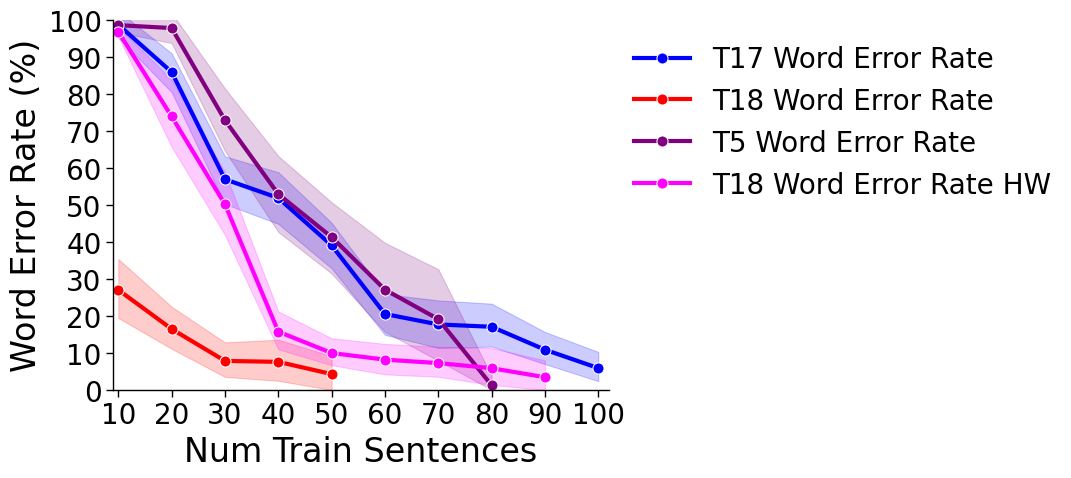

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
num_train_trials = [10,20,30,40,50,60,70,80,90,100]
all_raw_cers = []
all_postLM_wers = []
data_frame = []
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":24, 'legend.fontsize': 20, 'lines.markersize':8})   

num_train_trials = [10,20,30,40,50,60,70,80,90,100]
for n_train in num_train_trials:
    postLM_wers = np.load('T17NumTrainSentencesPlot/Train' + str(n_train) + 'PostLMWERs.npy')
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([n_train, 'T17 Word Error Rate', int(postLM_wers[trial]*100)])

num_train_trials = [10,20,30,40,50]

for n_train in num_train_trials:
    postLM_wers = np.load('T18NumTrainSentencesPlot/T18Train' + str(n_train) + 'PostLMWERs.npy')
    print(n_train, np.mean(postLM_wers))
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([n_train, 'T18 Word Error Rate', int(postLM_wers[trial]*100)])


num_train_trials = [10,20,30,40,50,60,70,80]
for n_train in num_train_trials:
    postLM_wers = np.load('T5NumTrainSentencesPlot/T5Train' + str(n_train) + 'PostLMWERs.npy')
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([n_train, 'T5 Word Error Rate', int(postLM_wers[trial]*100)])
df = pd.DataFrame(data_frame, columns=['Num Train Sentences', 'Metric', 'Word Error Rate (%)'])
print(df)

num_train_trials = [10,20,30,40,50,60,70,80,90]
for n_train in num_train_trials:
    postLM_wers = np.load('T18NumTrainSentencesPlot-HW/T18HWTrain' + str(n_train) + 'PostLMWERs.npy')
    print(n_train, np.mean(postLM_wers))
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([n_train, 'T18 Word Error Rate HW', int(postLM_wers[trial]*100)])
df = pd.DataFrame(data_frame, columns=['Num Train Sentences', 'Metric', 'Word Error Rate (%)'])
print(df)

flatui = ['blue', 'red', 'purple', 'magenta']
sns.set_palette(flatui)
g = sns.lineplot(x='Num Train Sentences', y='Word Error Rate (%)', hue='Metric', marker='o', data=df, linewidth=3)
sns.despine()


plt.gca().legend().set_title('')

plt.xlim([9, 102])
plt.ylim([0, 100])
plt.legend(frameon=False)
g.xaxis.set_major_locator(ticker.MultipleLocator(10))
g.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('T5T17T18OfflineTrainTrialsWER.pdf', bbox_inches='tight')
plt.show()